In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression
from sklearn.metrics import mean_squared_error

from utils.helper import load_and_summarize, scale_dataframe

In [29]:
df_housing = load_and_summarize('CSV Files/processed_housing_data.csv')

--- Loading processed_housing_data.csv ---
First 5 rows:
      price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0  1.000000  0.396564       0.6   0.333333  0.666667       1.0        0.0   
1  0.909091  0.502405       0.6   1.000000  1.000000       1.0        0.0   
2  0.909091  0.571134       0.4   0.333333  0.333333       1.0        0.0   
3  0.906061  0.402062       0.6   0.333333  0.333333       1.0        0.0   
4  0.836364  0.396564       0.6   0.000000  0.333333       1.0        1.0   

   basement  hotwaterheating  airconditioning   parking  prefarea  \
0       0.0              0.0              1.0  0.666667       1.0   
1       0.0              0.0              1.0  1.000000       0.0   
2       1.0              0.0              0.0  0.666667       1.0   
3       1.0              0.0              1.0  1.000000       1.0   
4       1.0              0.0              1.0  0.666667       0.0   

   furnishingstatus  
0               1.0  
1               1.0  

In [30]:
# Preprocessing: Encode categorical 'furnishingstatus' column
encoder = LabelEncoder()
df_housing['furnishingstatus'] = encoder.fit_transform(df_housing['furnishingstatus'])

In [31]:
# Scale all features to a range between 0 and 1
df_housing_scaled = scale_dataframe(df_housing)

In [32]:

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    df_housing_scaled.drop('price', axis=1),
    df_housing_scaled['price'],
    test_size=0.2,
    random_state=42
)

print("\nHousing data has been successfully loaded and prepared for regression.")


Housing data has been successfully loaded and prepared for regression.


# Ridge Regression (L2) with Cross-Validation
RidgeCV efficiently finds the best alpha (regularization strength) using cross-validation.

In [33]:
alphas = np.logspace(-3, 1, 100)
ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(X_train_r, y_train_r)

RidgeCV(alphas=array([1.00000000e-03, 1.09749877e-03, 1.20450354e-03, 1.32194115e-03,
       1.45082878e-03, 1.59228279e-03, 1.74752840e-03, 1.91791026e-03,
       2.10490414e-03, 2.31012970e-03, 2.53536449e-03, 2.78255940e-03,
       3.05385551e-03, 3.35160265e-03, 3.67837977e-03, 4.03701726e-03,
       4.43062146e-03, 4.86260158e-03, 5.33669923e-03, 5.85702082e-03,
       6.42807312e-03, 7.05480231e-0...
       1.17681195e+00, 1.29154967e+00, 1.41747416e+00, 1.55567614e+00,
       1.70735265e+00, 1.87381742e+00, 2.05651231e+00, 2.25701972e+00,
       2.47707636e+00, 2.71858824e+00, 2.98364724e+00, 3.27454916e+00,
       3.59381366e+00, 3.94420606e+00, 4.32876128e+00, 4.75081016e+00,
       5.21400829e+00, 5.72236766e+00, 6.28029144e+00, 6.89261210e+00,
       7.56463328e+00, 8.30217568e+00, 9.11162756e+00, 1.00000000e+01]))

In [34]:
y_pred_ridge = ridge_cv.predict(X_test_r)
ridge_mse = mean_squared_error(y_test_r, y_pred_ridge)

print("--- Ridge Regression (L2) Results ---")
print(f"Best Ridge Alpha found: {ridge_cv.alpha_:.4f}")
print(f"Ridge Regression MSE: {ridge_mse:.4f}\n")
print("Ridge Coefficients (shrunk but non-zero):")
print(pd.Series(ridge_cv.coef_, index=X_train_r.columns))

--- Ridge Regression (L2) Results ---
Best Ridge Alpha found: 0.3199
Ridge Regression MSE: 0.0133

Ridge Coefficients (shrunk but non-zero):
area                0.286866
bedrooms            0.037250
bathrooms           0.276869
stories             0.105021
mainroad            0.032596
guestroom           0.020880
basement            0.033749
hotwaterheating     0.058953
airconditioning     0.068573
parking             0.060160
prefarea            0.054631
furnishingstatus    0.036698
dtype: float64


# Lasso Regression (L1) with Cross-Validation
LassoCV finds the best alpha using cross-validation.

In [35]:
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X_train_r, y_train_r)

LassoCV(alphas=array([1.00000000e-03, 1.09749877e-03, 1.20450354e-03, 1.32194115e-03,
       1.45082878e-03, 1.59228279e-03, 1.74752840e-03, 1.91791026e-03,
       2.10490414e-03, 2.31012970e-03, 2.53536449e-03, 2.78255940e-03,
       3.05385551e-03, 3.35160265e-03, 3.67837977e-03, 4.03701726e-03,
       4.43062146e-03, 4.86260158e-03, 5.33669923e-03, 5.85702082e-03,
       6.42807312e-03, 7.05480231e-0...
       1.17681195e+00, 1.29154967e+00, 1.41747416e+00, 1.55567614e+00,
       1.70735265e+00, 1.87381742e+00, 2.05651231e+00, 2.25701972e+00,
       2.47707636e+00, 2.71858824e+00, 2.98364724e+00, 3.27454916e+00,
       3.59381366e+00, 3.94420606e+00, 4.32876128e+00, 4.75081016e+00,
       5.21400829e+00, 5.72236766e+00, 6.28029144e+00, 6.89261210e+00,
       7.56463328e+00, 8.30217568e+00, 9.11162756e+00, 1.00000000e+01]),
        cv=5, random_state=42)

In [36]:
y_pred_lasso = lasso_cv.predict(X_test_r)
lasso_mse = mean_squared_error(y_test_r, y_pred_lasso)

print("\n--- Lasso Regression (L1) Results ---")
print(f"Best Lasso Alpha found: {lasso_cv.alpha_:.4f}")
print(f"Lasso Regression MSE: {lasso_mse:.4f}\n")
print("Lasso Coefficients (Note features shrunk to zero):")
print(pd.Series(lasso_cv.coef_, index=X_train_r.columns))


--- Lasso Regression (L1) Results ---
Best Lasso Alpha found: 0.0010
Lasso Regression MSE: 0.0139

Lasso Coefficients (Note features shrunk to zero):
area                0.266165
bedrooms            0.005263
bathrooms           0.265001
stories             0.104217
mainroad            0.028698
guestroom           0.018362
basement            0.032491
hotwaterheating     0.039822
airconditioning     0.068945
parking             0.058359
prefarea            0.052836
furnishingstatus    0.034976
dtype: float64


# Train a Standard Linear Regression for Comparison

In [37]:
lr = LinearRegression()
lr.fit(X_train_r, y_train_r)

LinearRegression()

In [38]:
coefficients = pd.DataFrame({
    'Feature': X_train_r.columns,
    'Linear': lr.coef_,
    'Ridge': ridge_cv.coef_,
    'Lasso': lasso_cv.coef_
})

In [39]:
# Melt the DataFrame for easy plotting with seaborn
coefficients_melted = coefficients.melt(id_vars='Feature', var_name='Model', value_name='Coefficient')

# Plot the Coefficients 

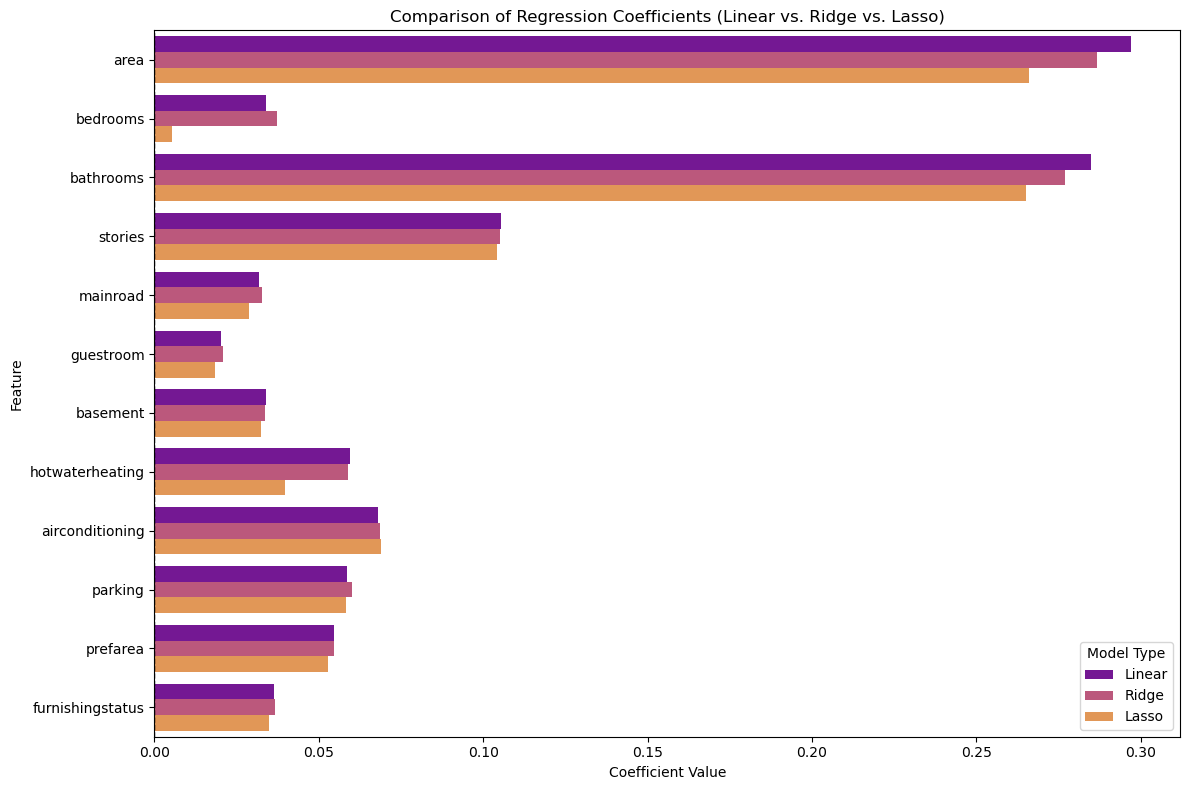

In [40]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', hue='Model', data=coefficients_melted, palette='plasma')
plt.title('Comparison of Regression Coefficients (Linear vs. Ridge vs. Lasso)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.legend(title='Model Type')
plt.tight_layout()
plt.show()

## Key Findings

* **Ridge Regression (L2)** found an optimal alpha of **0.3199** and produced a model with an excellent MSE of **0.0133**. The visualization confirms that it shrinks the magnitude of all coefficients compared to a standard linear model but keeps all features in the model.

* **Lasso Regression (L1)** found an optimal alpha of **0.0010** and a slightly higher MSE of **0.0139**. In this instance, while Lasso is known for feature selection, the optimal regularization strength was not enough to eliminate any features entirely. The `bedrooms` coefficient was shrunk to a very small value (0.005) but was not set to zero.

* **Performance Comparison**: For this dataset and tuning process, **Ridge Regression was the top-performing model** with a slightly lower MSE. The comparison plot clearly illustrates how both regularization methods effectively reduce the magnitude of feature coefficients, leading to a more generalized and less complex model compared to standard linear regression.